In [108]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
x = torch.unsqueeze(torch.linspace(-1 ,1 ,100),dim = 1)
y = x.pow(2) +0.2*torch.rand(x.size())

In [110]:
X = Variable(x , requires_grad=True)
Y = Variable(y)

In [111]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.output = torch.nn.Linear(n_hidden2, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.output(x)
        return x

In [112]:
net = Net(1, 10, 6, 1)

In [113]:
print net

Net(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=6, bias=True)
  (output): Linear(in_features=6, out_features=1, bias=True)
)


In [114]:
optimizer = torch.optim.Adam(net.parameters(), lr =0.2)
loss_func = torch.nn.MSELoss()

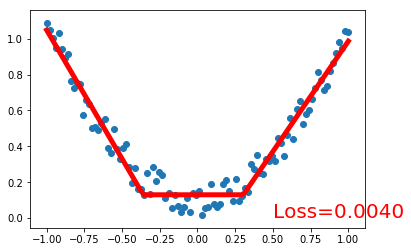

In [116]:
for t in range(100):
    prediction = net(X)     

    loss = loss_func(prediction, Y)     

    optimizer.zero_grad()   
    loss.backward()         
    optimizer.step()        

    if t % 1 == 0:
        
        plt.cla()
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})